# Which programming language are you using in 2022?

In this analysis, the following questions are answered:
* Which programming languages are popular in 2022?
* Who is already using the most popular languages from 2022?
* Do programming languages start as a hobby language and get used by professionals later?
Its results are described in a [blog post](https://medium.com/@maurits_94643/what-programming-language-do-you-use-in-2022-d083b2cafbd9).

## Business understanding

The goal of this analysis is to write a blog post. This post should provide answers to the three questions stated before. Adequate charts, tables or figures must be produced to support in communicating our findings.

To answer these questions, data from the [Stack Overflow Annual Developer Survey](https://insights.stackoverflow.com/survey) is used, including historical data. These surveys seem to be adequate to answer our questions. Every year asks for the used languages and there are enough other questions to get an idea who is using a given language. The last 3 years ask respondents if they code as a hobby. This can be used to answer our third question.

The analysis will be done in this Python notebook using the Pandas and Sklearn:

In [0]:
from google.colab import drive
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
from sklearn import tree
from sklearn.metrics import accuracy_score
from scipy import stats


## Data understanding

Data can be downloaded from StackOverflow and loaded in Pandas dataframes.

In [0]:
root_path = './surveydata';

In the CSV's we can also see that the 2011-2015 data have the answer options on the second line. Therefore, skip the first line for these years.

In [0]:
# Load all data and store them in a single hash indexed by year.
df = {}
df[2011] = pd.read_csv(root_path + '/2011.csv', encoding="ISO-8859-1", skiprows=1, na_values=['NA', 'NaN'])
df[2012] = pd.read_csv(root_path + '/2012.csv', encoding="ISO-8859-1", skiprows=1, na_values=['NA', 'NaN'])
df[2013] = pd.read_csv(root_path + '/2013.csv', encoding="ISO-8859-1", skiprows=1, na_values=['NA', 'NaN'])
df[2014] = pd.read_csv(root_path + '/2014.csv', encoding="ISO-8859-1", skiprows=1, na_values=['NA', 'NaN'])
df[2015] = pd.read_csv(root_path + '/2015.csv', encoding="ISO-8859-1", skiprows=1, na_values=['NA', 'NaN'])
df[2016] = pd.read_csv(root_path + '/2016.csv', encoding="ISO-8859-1", skiprows=0, na_values=['NA', 'NaN'])
df[2017] = pd.read_csv(root_path + '/2017.csv', encoding="ISO-8859-1", skiprows=0, na_values=['NA', 'NaN'])
df[2018] = pd.read_csv(root_path + '/2018.csv', encoding="ISO-8859-1", skiprows=0, na_values=['NA', 'NaN'])
df[2019] = pd.read_csv(root_path + '/2019.csv', encoding="ISO-8859-1", skiprows=0, na_values=['NA', 'NaN'])

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (62) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (5,108,121,196,197,198) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (8,12,13,14,15,16,50,51,52,53,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=r

First, we check the size and columns for each dataset.

In [0]:
# Print the columns per year.
for i in range(2011, 2020):
    print("Year " + str(i))
    print(df[i].shape)
    print(list(df[i].columns))

Year 2011
(2813, 65)
['Response', 'Response.1', 'Response.2', 'Response.3', 'Response.4', 'Response.5', 'Response.6', 'Response.7', 'Influencer', 'Recommender', 'Approver', 'Purchaser', 'Check Writer', 'No Involvement', "I'm a Seller", 'Hardware', 'Servers', 'Software', 'User Equipment: Monitors, PCs, Laptops', 'Consultants', 'Other', '<$10,000', '$10,001 - $25,000', '$25,001 - $40,000', '$41,000 - $75,000', '$75,001 - $100,000', '$100,001 - $150,000', '>$150,000', "Don't know", 'Response.8', 'Java', 'JavaScript', 'CSS', 'PHP', 'Python', 'Ruby', 'SQL', 'C#', 'C++', 'C', 'Perl', 'None', 'other (please specify)', 'Response.9', 'Response.10', 'Response.11', 'iPhone', 'Android', 'Blackberry', 'Other Smart Phone', 'Regular Mobile Phone', 'Kindle', 'Nook', 'Blu-Ray', 'HDTV', 'AppleTV', 'iPad', 'Other netbook', 'PS3', 'Xbox', 'Wii', 'Other gaming system', 'other (please specify).1', 'Response.12', 'Response.13']
Year 2012
(6243, 75)
['Response', 'Response.1', 'Response.2', 'Response.3', 'Resp

The survey is clearly different each year.

In [0]:
df[2019].describe()

,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
count,88883.000000,5.594500e+04,5.582300e+04,64503.000000,49790.000000,79210.000000
mean,44442.000000,5.519014e+11,1.271107e+05,42.127197,5.084308,30.336699
std,25658.456325,7.331926e+13,2.841523e+05,37.287610,5.513931,9.178390
min,1.000000,0.000000e+00,0.000000e+00,1.000000,0.000000,1.000000
25%,22221.500000,2.000000e+04,2.577750e+04,40.000000,2.000000,24.000000
50%,44442.000000,6.200000e+04,5.728700e+04,40.000000,4.000000,29.000000
75%,66662.500000,1.200000e+05,1.000000e+05,44.750000,6.000000,35.000000
max,88883.000000,1.000000e+16,2.000000e+06,4850.000000,99.000000,99.000000


There are only a few numerical columns. Not all fields have the same counts, so there are missing values. Also, the minimum value of 1 and maximum of 99 in the age field look erroneous.

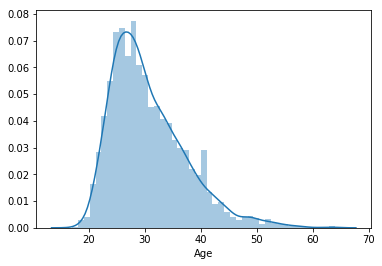

In [0]:
sns.distplot(df[2019].dropna().Age)

The respondents do not contain very young or old groups. The rows with age < 10 or age > 70 are likely errors. The small number of records is not likely to be important, but erroneous data might affect our analysis in a negative way. Therefore, we drop these rows.

In [0]:
df[2019] = df[2019][(df[2019].Age >= 10) & (df[2019].Age <= 70)]

Check the number of missing values per row.

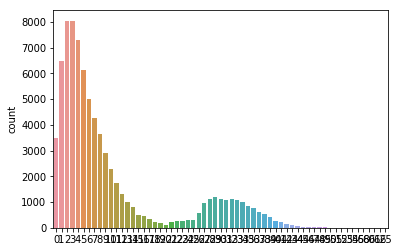

In [0]:
missing_values = df[2019].shape[1] - df[2019].apply(lambda x: x.count(), axis=1)
sns.countplot(missing_values)

There is a large group with a lot of missing values. Perhaps these are unemployed, not coding or some other legitimate group. No spikes are visible with very high missing values. Therefore, there is no reason to drop rows based on this figure.

For the first question, we are interested in the used programming languages. Each year has its own columns for this data. Save the columns in a dict for reference.

In [0]:
# Save the relevant columns, used in later code.
columns = {}
columns[2011] = ['Java', 'JavaScript', 'CSS', 'PHP', 'Python', 'Ruby', 'SQL', 'C#', 'C++', 'C', 'Perl']
columns[2012] = ['Java', 'JavaScript', 'CSS', 'PHP', 'Python', 'Objective-C', 'Ruby', 'SQL', 'C#', 'C++', 'C', 'Perl']
columns[2013] = ['C', 'C++', 'C#', 'Java', 'JavaScript', 'Node.js', 'Objective-C', 'PHP', 'Python', 'Ruby', 'SQL', 'Node.js.1', 'Haskell', 'CoffeeScript', 'Dart', 'TypeScript', 'C++11', 'F#']
columns[2014] = ['C', 'C++', 'C#', 'Java', 'JavaScript', 'Node.js', 'Objective-C', 'PHP', 'Python', 'Ruby', 'SQL', 'Node.js.1', 'Haskell', 'CoffeeScript', 'Dart', 'C++11', 'Redis', 'MongoDB', 'F#', 'Go']
columns[2015] = ['Current Lang & Tech: C', 'Current Lang & Tech: C++', 'Current Lang & Tech: C++11', 'Current Lang & Tech: C#', 'Current Lang & Tech: CoffeeScript', 'Current Lang & Tech: Clojure', 'Current Lang & Tech: Dart', 'Current Lang & Tech: F#', 'Current Lang & Tech: Go', 'Current Lang & Tech: Haskell', 'Current Lang & Tech: Java', 'Current Lang & Tech: JavaScript', 'Current Lang & Tech: Matlab', 'Current Lang & Tech: Node.js', 'Current Lang & Tech: Objective-C', 'Current Lang & Tech: Perl', 'Current Lang & Tech: PHP', 'Current Lang & Tech: Python', 'Current Lang & Tech: R', 'Current Lang & Tech: Ruby', 'Current Lang & Tech: Rust', 'Current Lang & Tech: Scala', 'Current Lang & Tech: SQL', 'Current Lang & Tech: SQL Server', 'Current Lang & Tech: Swift', 'Current Lang & Tech: Visual Basic']
columns[2016] = ['tech_do'] # "; " separated
columns[2017] = ['HaveWorkedLanguage'] # "; " separated
columns[2018] = ['LanguageWorkedWith'] # ";" separated
columns[2019] = ['LanguageWorkedWith'] # ";" separated

Check the missing data in the columns used to answer the first question.

In [0]:
for year in range(2011, 2020):
  rows = df[year].shape[0]
  missing = rows - df[year].dropna(how='all', subset=columns[year]).shape[0]
  print('{}: {:.2f}'.format(year, missing / rows * 100))

2011: 9.85
2012: 12.48
2013: 18.03
2014: 15.27
2015: 16.53
2016: 12.50
2017: 28.73
2018: 20.76
2019: 0.85


For the second question, we want to assess as much features as possible. But we only want to detect features with low missing values. Check columns with > 20% missing values.

In [0]:
def missing_data(df):
  missing_percent = []
  for column in df.columns:
    nacount = df[column].isna().sum()
    napercent = nacount / df.shape[0] * 100
    missing_percent.append([napercent, nacount])
  missing = pd.DataFrame(missing_percent)
  missing.columns = ['na_percent', 'na_count']
  missing.index = df.columns
  return missing

missing = missing_data(df[2019])
missing[missing.na_percent > 20]

,na_percent,na_count
MgrIdiot,29.402534,23233
MgrMoney,29.382285,23217
MgrWant,29.305086,23156
LastInt,22.497690,17777
CompTotal,32.200666,25444
CompFreq,25.292026,19985
ConvertedComp,32.333548,25549
WorkWeekHrs,23.467102,18543
WorkPlan,20.056444,15848
WorkChallenge,20.922080,16532


It does not contain any important columns. Drop them.

In [0]:
df[2019] = df[2019].drop(columns=list(missing[missing.na_percent > 20].index))

We handled the missing data. Handling of categorical data will be done in the data preparation step for the second question.

# Which programming languages are popular in 2022?

The downloads contain a description of the survey. The survey questions are different each year, but each year asks for the languages used. The data can be aggregated per year and then be used to find a function that can predict its usage for a given year.

## Data preparation


The years 2011-2015 have a column per programming language. In 2015, the names are prepended by the string "Current Lang & Tech: ". From 2016 onwards, the languages are contained in a single cell, separated by a semicolon (and sometimes a space). The names for these columns are different each year.

Rows may contain only NA's in the relevant columns. This can be because the survey is not filled in completely, or because the respondent is not a developer at all. In both cases we want to drop these rows.

In [0]:
for year in range(2011, 2020):
  before = df[year].shape[0]
  df[year] = df[year].dropna(subset=columns[year], how='all').reset_index(drop=True)
  after = df[year].shape[0]
  print('Year {}: {} to {} rows'.format(year, before, after))

Year 2011: 2813 to 2536 rows
Year 2012: 6243 to 5464 rows
Year 2013: 9742 to 7986 rows
Year 2014: 7643 to 6476 rows
Year 2015: 26086 to 21774 rows
Year 2016: 56030 to 49025 rows
Year 2017: 51392 to 36625 rows
Year 2018: 98855 to 78334 rows
Year 2019: 79017 to 78342 rows


To compare the programming language usage over years, we want to aggregate the usage per year first. Define functions for building a hash with the usage per language, for a single year.

Start with a function for the years where all languages are stored in a single column. This function should work on the years 2016-2019, which is using different namings for their columns.

In [0]:
def get_counts_multiple(df):
  counts = {}
  sep = ';'
  for i in range(0, df.shape[0]):
    if 'tech_do' in df.columns:
      cell = df.tech_do[i]
    if 'HaveWorkedLanguage' in df.columns:
      cell = df.HaveWorkedLanguage[i]
    if 'LanguageWorkedWith' in df.columns:
      cell = df.LanguageWorkedWith[i]
    cell = str(cell)
    if cell == 'nan':
      continue;
    for value in str(cell).split(sep):
      value = value.strip()
      if value in counts:
        counts[value] += 1
      else:
        counts[value] = 1
  for i in counts:
    counts[i] /= df.shape[0]
  return counts;

# Print results for a single language to check results.
for i in range(2016, 2020):
  print('Year {}: {}'.format(i, get_counts_multiple(df[i])['C++']))

Year 2016: 0.19559408465068842
Year 2017: 0.22266211604095562
Year 2018: 0.25368294737917124
Year 2019: 0.22949375813739756


Subsequently, we have to define a function to get the counts for earlier years. These have a separate column per language. Since we are only interested in popular languages in the future, we only consider languages that are still in use. That is, languages included in the 2019 survey. These columns include HTML/CSS, which is not a programming language, and "Other(s):". We will not use them because we are only interested in popular programming languages.

In [0]:
# Save a list of the considered languages.
languages = ['Java', 'JavaScript', 'Python', 'C++', 'C', 'C#', 'SQL', 'VBA', 'R', 'Ruby', 'Rust', 'TypeScript', 'WebAssembly', 'Go', 'PHP', 'Assembly', 'Kotlin', 'Swift', 'Objective-C', 'Elixir', 'Erlang', 'Clojure', 'F#', 'Scala', 'Dart']

Define functions to get counts for 2011-2015 and a utility function that works for all years.

In [0]:
def get_counts_columns(df, columns):
  counts = {}
  for col in columns:
    if col in df.columns:
      counts[col] = 1 - (df[col].isna().sum() / df.shape[0])
    if 'Current Lang & Tech: ' + col in df.columns:
      counts[col] = 1 - (df['Current Lang & Tech: ' + col].isna().sum() / df.shape[0])
  return counts;

def get_counts(year):
  if (year < 2016):
    counts = get_counts_columns(df[year], languages)
  else:
    counts = get_counts_multiple(df[year])
  return counts

# Print results for a single language to check results.
for i in range(2011, 2020):
  print('Year {}: {}'.format(i, get_counts(i)['C++']))


Year 2011: 0.29179810725552047
Year 2012: 0.2792825768667643
Year 2013: 0.2123716503881793
Year 2014: 0.2189623224212477
Year 2015: 0.2080003674106733
Year 2016: 0.19559408465068842
Year 2017: 0.22266211604095562
Year 2018: 0.25368294737917124
Year 2019: 0.22949375813739756


In [0]:
# Print a single year for sanity check.
get_counts(2017)

{'Assembly': 0.04977474402730375,
 'C': 0.19041638225255972,
 'C#': 0.34064163822525595,
 'C++': 0.22266211604095562,
 'Clojure': 0.010675767918088738,
 'CoffeeScript': 0.032546075085324234,
 'Common Lisp': 0.007453924914675768,
 'Dart': 0.003959044368600682,
 'Elixir': 0.01037542662116041,
 'Erlang': 0.007672354948805461,
 'F#': 0.012477815699658702,
 'Go': 0.042511945392491465,
 'Groovy': 0.032573378839590446,
 'Hack': 0.0029215017064846416,
 'Haskell': 0.017720136518771332,
 'Java': 0.39655972696245734,
 'JavaScript': 0.6245733788395904,
 'Julia': 0.0037679180887372015,
 'Lua': 0.028368600682593857,
 'Matlab': 0.04283959044368601,
 'Objective-C': 0.06413651877133106,
 'PHP': 0.2809556313993174,
 'Perl': 0.04327645051194539,
 'Python': 0.3195631399317406,
 'R': 0.04461433447098976,
 'Ruby': 0.09075767918088737,
 'Rust': 0.011358361774744027,
 'SQL': 0.5120546075085324,
 'Scala': 0.03574061433447099,
 'Smalltalk': 0.008928327645051195,
 'Swift': 0.06465529010238907,
 'TypeScript': 0.0

Collect all results in a single dataframe.

In [0]:
usage = pd.DataFrame(index=range(2011, 2019 + 1), columns=languages, dtype=np.float)
usage = usage.fillna(0)

for year in range(2011, 2020):
  counts = get_counts(year)
  for lang in languages:
    if lang in counts:
      usage[lang][year] = counts[lang]

usage

,Java,JavaScript,Python,C++,C,C#,SQL,VBA,R,Ruby,Rust,TypeScript,WebAssembly,Go,PHP,Assembly,Kotlin,Swift,Objective-C,Elixir,Erlang,Clojure,F#,Scala,Dart
2011,0.339511,0.559543,0.226735,0.291798,0.292192,0.533123,0.636041,0.000000,0.000000,0.112382,0.000000,0.000000,0.000000,0.000000,0.310726,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2012,0.429722,0.572291,0.221449,0.279283,0.271596,0.451684,0.602855,0.000000,0.000000,0.105600,0.000000,0.000000,0.000000,0.000000,0.352306,0.000000,0.000000,0.000000,0.110725,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2013,0.378162,0.592913,0.235412,0.212372,0.179815,0.379038,0.575131,0.000000,0.000000,0.099424,0.000000,0.077010,0.000000,0.000000,0.291009,0.000000,0.000000,0.000000,0.119584,0.000000,0.000000,0.000000,0.076133,0.000000,0.051465
2014,0.382798,0.584157,0.227455,0.218962,0.181285,0.367202,0.535361,0.000000,0.000000,0.091569,0.000000,0.000000,0.000000,0.096665,0.264052,0.000000,0.000000,0.000000,0.104231,0.000000,0.000000,0.000000,0.076590,0.000000,0.053274
2015,0.377469,0.549371,0.240562,0.208000,0.165886,0.319142,0.433499,0.000000,0.034674,0.081060,0.004730,0.000000,0.000000,0.021218,0.299853,0.000000,0.000000,0.034858,0.078947,0.000000,0.000000,0.008083,0.007991,0.024708,0.005006
2016,0.365977,0.558593,0.250525,0.195594,0.156614,0.311739,0.448261,0.000000,0.033289,0.089403,0.008893,0.000000,0.000000,0.031555,0.260683,0.000000,0.000000,0.056012,0.065314,0.000000,0.000000,0.011341,0.009873,0.032677,0.004528
2017,0.396560,0.624573,0.319563,0.222662,0.190416,0.340642,0.512055,0.042976,0.044614,0.090758,0.011358,0.095235,0.000000,0.042512,0.280956,0.049775,0.000000,0.064655,0.064137,0.010375,0.007672,0.010676,0.012478,0.035741,0.003959
2018,0.453456,0.698113,0.387558,0.253683,0.230321,0.344091,0.570250,0.048638,0.061442,0.100991,0.023706,0.173947,0.000000,0.070621,0.307287,0.073531,0.044783,0.080553,0.070340,0.000000,0.011311,0.013174,0.014234,0.043659,0.000000
2019,0.406155,0.683592,0.417273,0.229494,0.198935,0.314008,0.548658,0.053356,0.056764,0.084884,0.031733,0.216334,0.010646,0.082344,0.262745,0.062751,0.064461,0.064627,0.046808,0.014207,0.008361,0.013594,0.010850,0.037923,0.019109


## Modeling

To predict the usage in the future, we want to find a function that calculates the usage in terms of the year. Linear regression can be used to find such functions. We combine this with a polynomial function to model a curve. For this, we have to decide on the degree to use. A 2nd-degree can only be a straight line or hyperbola, but a 3th-degree can have a wave that goes up, down and up again (or vice versa). This might be expected for some languages. A 4th-degree curve is likely to overfit our data. Therefore, we use a 3th-degree polynomial function.

Define a function that calculates the coëfficients for each langauge.

In [0]:
def fit_curves(usage, degree = 3):
  out = pd.DataFrame(index=usage.columns, columns=range(0, degree + 1))
  for col in usage.columns:
    X = list(map(lambda item : [item], usage.index))
    y = usage[col].values
    
    # Strip the first years where usage is zero.
    skip = 0
    for year in usage.index:
      if usage[col][year] == 0:
        skip += 1
      else:
        break

    X = X[skip:]
    y = y[skip:]
    
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)

    poly_model = LinearRegression(fit_intercept = True).fit(X_poly, y)
    
    out[0][col] = poly_model.intercept_
    for i in range(1, degree + 1):
      out[i][col] = poly_model.coef_[i]

  return out

curves = fit_curves(usage, 3)
curves.head()
    

,0,1,2,3
Java,-4.67089e+06,6955.46,-3.45247,0.000571233
JavaScript,-4.62923e+06,6899.88,-3.42809,0.00056773
Python,-1.37738e+06,2061.36,-1.02832,0.000170992
C++,4.26578e+06,-6343.1,3.144,-0.000519448
C,6.45045e+06,-9592.21,4.75473,-0.000785618


The curve is defined by the function $y = c_0x^0 + c_1x^1 + c_2x^2 + c_3x^3 = c_0 + c_1x + c_2x^2 + c_3x^3$, where $y$ is the usage, $x$ is the year and $c_n$ is the coëfficient.

The column name is the degree of the coëfficient.
For example, for Java, the curve is $-506000 + 7530x + -3.74x^2 + 0.000618x^3$ (coéfficients rounded to 3 significant figures).

Now define a function that usages this table to predict to usage in a given year and add our predictions to the `curves` table.

In [0]:
def predict_year(curves, year, degrees = 3):
  colname = str(year)
  pred = curves.copy()[0]
  for i in range(1, degrees + 1):
    pred += curves[i] * year ** i
  # Values below 0 or above 1 don't make sense in our context.
  pred = pred.map(lambda item : max(0, min(1, item)))
  args = {colname: pred}
  curves = curves.assign(**args)
  return curves

# Add predictions to the curves dataframe.
for year in range(2020, 2026):
  curves = predict_year(curves, year)

# Print the fast risers.
curves.sort_values(by=3, ascending=False)

,0,1,2,3,2020,2021,2022,2023,2024,2025
Dart,-4.97453e+06,7409.98,-3.67925,0.000608946,0.056211,0.114704,0.198780,0.312092,0.458294,0.641040
Java,-4.67089e+06,6955.46,-3.45247,0.000571233,0.471243,0.529388,0.609361,0.714590,0.848502,1.000000
JavaScript,-4.62923e+06,6899.88,-3.42809,0.00056773,0.786306,0.888665,1.000000,1.000000,1.000000,1.000000
SQL,-4.15936e+06,6208.54,-3.08906,0.000512317,0.663650,0.780033,0.930646,1.000000,1.000000,1.000000
Objective-C,-2.48273e+06,3696.27,-1.83432,0.000303434,0.059074,0.073174,0.098072,0.135591,0.187549,0.255769
Python,-1.37738e+06,2061.36,-1.02832,0.000170992,0.510576,0.606867,0.719958,0.850878,1.000000,1.000000
Clojure,-1.2641e+06,1879.8,-0.931796,0.000153961,0.016569,0.021770,0.030306,0.043101,0.061077,0.085160
Elixir,16682,-6.0903e-06,-0.0122902,4.06036e-06,0.053021,0.116465,0.204566,0.317346,0.454830,0.617043
Kotlin,-13.1856,1.31714e-16,5.31729e-13,1.60994e-09,0.084159,0.103876,0.123613,0.143370,0.163145,0.182941
WebAssembly,0.0106456,0,0,0,0.010646,0.010646,0.010646,0.010646,0.010646,0.010646


## Evaluation

Build a graph to visualize the results. This visualization should include both the usage as provided by the StackOverflow surveys, as well as the curves used for our prediction. Since we want to know which languages are popular in 2022, we have to clearly mark this date in the graph. Also, we want the top-10 languages in 2022 and have the most popular languages listed first.

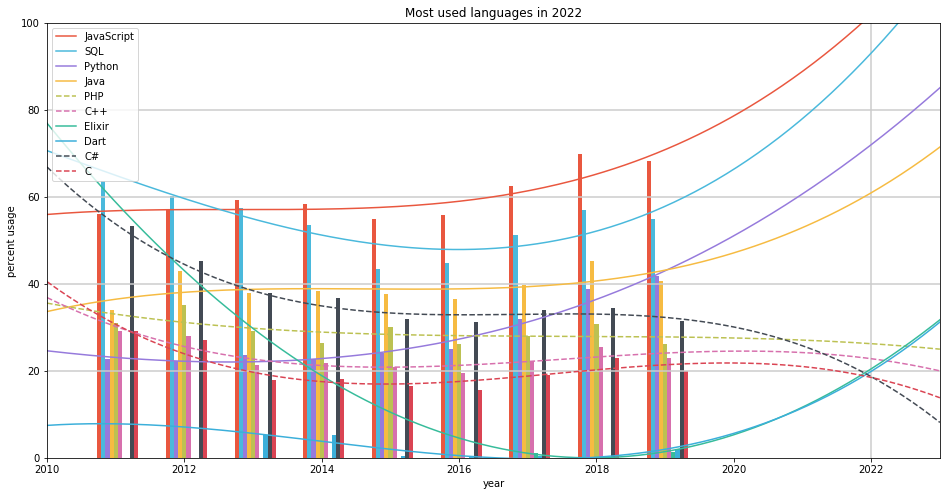

In [0]:
def plot_curves(curves, usage, title='Programming languages', degrees=3):
  # Initialize figure.
  plt.figure(figsize=(16,8))
  axes = plt.gca()
  axes.set_xlim([2010, 2023])
  axes.set_ylim([0, 100])
  
  # Plot a vertical line in 2022.
  plt.axvline(x=2022, color="#cccccc")
  
  # Plot horizontal lines for readability.
  plt.axhline(y=80, color="#cccccc")
  plt.axhline(y=60, color="#cccccc")
  plt.axhline(y=40, color="#cccccc")
  plt.axhline(y=20, color="#cccccc")
  
  colors = ['#DA4453', '#E9573F', '#4AB9DC', '#967ADC', '#F6BB42', '#BCC152', '#D770AD', '#37BC9B', '#3BAFDA', '#434A54']
  index = 0
  for lang in list(curves.index):
    # Define a new line and apply each coéfficient.
    x = np.linspace(2010, 2023, 256, endpoint = True)
    y = x * 0
    for i in range(0, degrees + 1):
      y += curves[i][lang] * x ** i
    y *= 100
    
    index += 1
    color = colors[index % len(colors)]
    width = 0.06
    linetype = '-'
    
    # Mark declining languages with a dashed line.
    if curves[3][lang] < 0:
      linetype = '--'
    
    # Plot the line.
    plt.plot(x, y, linetype, color=color, label=lang)
    
    # Plot the bar.
    offset = width * len(list(curves.index)) / 2
    plt.bar(pd.Series(list(usage.index)) + width * index - offset, usage[lang] * 100, width=width, color=color)
  
  plt.xlabel('year')
  plt.ylabel('percent usage')
  plt.title(title)
  plt.legend(loc='upper left')

  plt.show()

plot_curves(curves.sort_values(by='2022', ascending=False)[0:10], usage, title='Most used languages in 2022')

This function is re-usable and can also be used to plot the fastest declining languages in the long-term. That is, the languages with the lowest values for the highest polynomial.

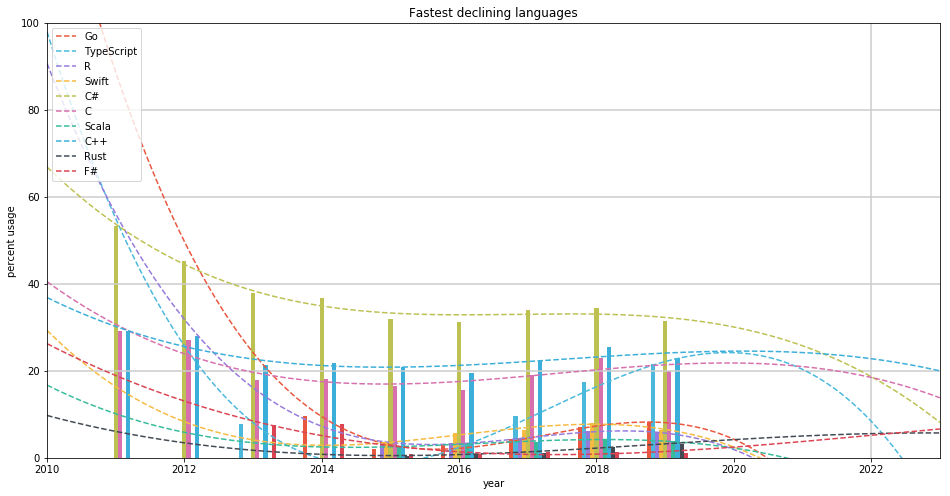

In [0]:
plot_curves(curves.sort_values(by=3, ascending=True)[0:10], usage, title='Fastest declining languages')

## Evaluation

The first chart gives a clear view of the languages that are popular in 2022. It answers the question and provides additional information on why it got to these results.

The second chart is optional but interesting enough to include in the blog post.

# Who is already using the most popular languages from 2022?

This question considers what data can be used to predict if someone is using a popular language or not. More specific, we want to know who is using it *right now*. Therefore, we use the most recent data for this analysis, which is from 2019 at the time of writing.

We are interested in the features that gives the best split between people that use the language and people who don't. But it is not likely we can tell this from a single feature, so we want to take more features into account. A decision tree does this by examining a single feature at a time, always taking the feature that gives the best split. There are numerous other methods that can be used, but I chose the decision tree because its results can be easily understood.

We will answer this question separately for the top-3 popular languages from 2022, namely JavaScript, SQL and Python.


## Data preparation

For each of the top-3 popular languages, we add a feature that indicates if this person is using that language. This feature is not available yet in the 2019 dataset since it stores all used languages in a single column.

We have to one-hot encode the categorical values and use the imputer to fill NA's before we can run the Decision Tree classifier. The default `pd.get_dummies` cannot be used for all columns since some of them have multiple values separated by a semicolon. We use our custom function for these columns. Note that this function also adds columns per language, such as `LanguageWorkedWith_python`, which we can use for filtering. Also, we will drop columns with answers to StackOverflow specific questions. This does not say much about the developer and thus is not the data we're looking for.

The Imputer is used to fill remaining NA's by replacing them with the mean. Columns with high missing values were already dropped. Therefore, this should not affect our analysis too much.

In [0]:
df_clean = df[2019]

# One-hot encoding for columns with multiple values.
def get_dummies_multiple(df, column, sep=';'):
  df = df.copy()
  for i in range(0, df.shape[0]):
    cell = df[column][i]
    if cell == '' or pd.isnull(cell):
      continue;
    for value in str(cell).split(sep):
      value = value.strip()
      dummy_col = column + '_' + value
      if not dummy_col in df.columns:
        df[dummy_col] = 0
      df.at[i, dummy_col] = 1
  return df.drop(column, axis=1)

# Apply one-hot encoding for fields with multiple values.
columns_multi = ['LanguageWorkedWith', 'LanguageDesireNextYear', 'DatabaseWorkedWith', 'PlatformWorkedWith', 'PlatformDesireNextYear', 'DevEnviron', 'SOVisitTo', 'Ethnicity', 'Gender', 'Sexuality', 'EduOther', 'DevType', 'JobFactors']
for column in columns_multi:
  df_clean = get_dummies_multiple(df_clean, column)

# Drop StackOverflow specific columns we're not particulary interested in.
df_clean = df_clean.drop(['SOVisit1st', 'SOVisitFreq', 'SOFindAnswer', 'SOTimeSaved', 'SOAccount', 'SOPartFreq', 'SOJobs'], axis=1)

# Print the number of rows and cols before one-hot encoding.
print(df_clean.shape)

# Apply one-hot encoding for all columns containing strings.
string_columns = df_clean.columns[df_clean.dtypes == 'object']
df_clean = pd.get_dummies(df_clean, columns=string_columns)

# Use imputer to fill NA's.
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
df_imp = pd.DataFrame(imp.fit_transform(df_clean))
df_imp.columns = df_clean.columns
df_imp.index = df_clean.index
df_clean = df_imp

# Print shape after cleaning.
print(df_clean.shape)


(78342, 232)
(78342, 987)


In [0]:
df_clean.head()

,Respondent,Age,LanguageWorkedWith_HTML/CSS,LanguageWorkedWith_Java,LanguageWorkedWith_JavaScript,LanguageWorkedWith_Python,LanguageWorkedWith_C++,LanguageWorkedWith_C,LanguageWorkedWith_C#,LanguageWorkedWith_SQL,LanguageWorkedWith_VBA,LanguageWorkedWith_R,LanguageWorkedWith_Bash/Shell/PowerShell,LanguageWorkedWith_Ruby,LanguageWorkedWith_Rust,LanguageWorkedWith_TypeScript,LanguageWorkedWith_WebAssembly,LanguageWorkedWith_Other(s):,LanguageWorkedWith_PHP,LanguageWorkedWith_Assembly,LanguageWorkedWith_Swift,LanguageWorkedWith_Kotlin,LanguageWorkedWith_Objective-C,LanguageWorkedWith_Elixir,LanguageWorkedWith_Erlang,LanguageWorkedWith_Go,LanguageWorkedWith_Clojure,LanguageWorkedWith_F#,LanguageWorkedWith_Scala,LanguageWorkedWith_Dart,LanguageDesireNextYear_C,LanguageDesireNextYear_C++,LanguageDesireNextYear_C#,LanguageDesireNextYear_Go,LanguageDesireNextYear_HTML/CSS,LanguageDesireNextYear_Java,LanguageDesireNextYear_JavaScript,LanguageDesireNextYear_Python,LanguageDesireNextYear_SQL,LanguageDesireNextYear_Elixir,...,SocialMedia_Twitter,SocialMedia_VK ÐÐÐ¾Ð½ÑÐ°ÌÐºÑÐµ,SocialMedia_WeChat å¾®ä¿¡,SocialMedia_Weibo æ°æµªå¾®å,SocialMedia_WhatsApp,SocialMedia_YouTube,SocialMedia_Youku Tudou ä¼é ·,Extraversion_In real life (in person),Extraversion_Neither,Extraversion_Online,ScreenName_Handle,ScreenName_Login,ScreenName_Screen Name,ScreenName_UserID,ScreenName_Username,"EntTeams_No, I've heard of them, but I am not part of a private Q&A instance","EntTeams_No, and I don't know what those are",EntTeams_Yes,SOComm_Neutral,"SOComm_No, not at all","SOComm_No, not really",SOComm_Not sure,"SOComm_Yes, definitely","SOComm_Yes, somewhat",WelcomeChange_A lot less welcome now than last year,WelcomeChange_A lot more welcome now than last year,WelcomeChange_Just as welcome now as I felt last year,WelcomeChange_Not applicable - I did not use Stack Overflow last year,WelcomeChange_Somewhat less welcome now than last year,WelcomeChange_Somewhat more welcome now than last year,Trans_No,Trans_Yes,Dependents_No,Dependents_Yes,SurveyLength_Appropriate in length,SurveyLength_Too long,SurveyLength_Too short,SurveyEase_Difficult,SurveyEase_Easy,SurveyEase_Neither easy nor difficult
0,1.0,14.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,2.0,19.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,3.0,28.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
3,4.0,22.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,5.0,30.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


## Modeling

Before applying the Decision Tree classifier, we split the data in a training and test set. The whole set has about 88k rows in no particular order. Use the first 10k as the testing set.

Export the trees as Graphviz (dot) files. We will render them outside this notebook for inspection.
Only print the accuracy score to see how well these trees perform.

Note that we are using a very low depth of 3. This is done for two reasons. First, we want a quick explanation of this model. Its main use is a quick exploration. Second, decision trees are prone to overfitting, which can be avoided by using a low depth.

Some columns should be excluded from this analysis. These are:

* `LanguageWorkedWith` answers our question. Also, languages can be closely related. For example, the usage of JavaScript correlates to the usage of HTML.
* `LanguageDesireNextYear` is likely to contain the language someone is currently using.
* `DatabaseWorkedWith` will tell if someone is using a database. And if so, the respondent is likely to use SQL. But this does not answer our question well.
* `DevEnviron` contains the development environment someone is using. Many environments are associated with a specific language. Examples are PyCharm and Jypiter for Python.
* `DevType` because database administrator and frontend developer correlates highly with SQL and JavaScript respectively.
* `PlatformWorkedWith` includes platforms that are highly aimed at specific languages.
* `PlatformDesireNextYear` for the same reasons.

In [0]:
def classify_language(lang):
  # Build a list of features to test for.
  features = list(filter(lambda value : value.split('_')[0] not in ['LanguageWorkedWith', 'LanguageDesireNextYear', 'DatabaseWorkedWith', 'DevEnviron', 'DevType', 'PlatformWorkedWith', 'PlatformDesireNextYear'], list(df_clean.columns)))

  # Split test and training set.
  X_train = df_clean.iloc[10000:,:][features]
  X_test = df_clean.iloc[:10000,:][features]
  y_train = df_clean.iloc[10000:,][['LanguageWorkedWith_' + lang]]
  y_test = df_clean.iloc[:10000,][['LanguageWorkedWith_' + lang]]

  # Fit decision tree.
  clf = DecisionTreeClassifier(random_state=2019, max_depth=3)
  clf.fit(X_train, y_train)

  # Check accuracy.
  pred = clf.predict(X_test)
  print('Accuracy for {}: {}'.format(lang, accuracy_score(y_test, pred)))

  # Save graph.
  tree.export_graphviz(clf, out_file=root_path + '/using_' + lang + '.dot', feature_names=features)

classify_language('JavaScript')
classify_language('SQL')
classify_language('Python')
  

Accuracy for JavaScript: 0.6915
Accuracy for SQL: 0.5805
Accuracy for Python: 0.6329


## Evaluation

The generated trees give an idea of who is using these languages. It contains enough specific details.

# Do programming languages start as a hobby language and get used by professionals later?

Recent surveys ask if the respondent is coding as a hobby.
2015 and 2016 ask for hours per week coding as a hobby. From 2017 on, this has been changed to a yes/no question. It is unknown if people who answered 1 hour per week in 2016 consider themselve a hobby coder when answered as a yes/no question. These results are not directly comparable. For that reason, we only compare 2017 and 2019.

## Data preparation

Build a table that lists the hobby usage in 2017 and 2019, per language. We are interested in the hobby usage relative to the total usage of that language. For example, if 40 out of 80 respondents is using PHP, and 30 out of that 40 is coding as a hobby, then the hobby usage is 75%, or 0.75.

In [0]:
hobbyists = {}
counts_hobby = {}

# Filter out the hobbyists, per year.
hobbyists[2017] = df[2017][df[2017].ProgramHobby != 'No']
hobbyists[2019] = df[2019][df[2019].Hobbyist == 'Yes']

# Build the dataframe.
usage_hobby = pd.DataFrame(index=languages, columns=[2017, 2019], dtype=np.float)

for year in [2017, 2019]:
  counts_hobby = get_counts_multiple(hobbyists[year].reset_index(drop=True))
  for lang in languages:
    if lang in counts_hobby:
      num_hobbyists = counts_hobby[lang] * hobbyists[year].shape[0]
      num_total = usage[lang][year] * df[year].shape[0]
      usage_hobby[year][lang] = num_hobbyists / num_total

# Drop languages that were not included in any of the years.
usage_hobby = usage_hobby.dropna()

usage_hobby.head()

,2017,2019
Java,0.837235,0.817625
JavaScript,0.839825,0.817997
Python,0.887987,0.852126
C++,0.869405,0.856499
C,0.883998,0.860892


## Modeling

We have to calculate the change, per language. Simply subtract the numbers to get the change in absolute percentage and add it to the dataframe.

In [0]:
usage_hobby = usage_hobby.assign(change=usage_hobby[2019] - usage_hobby[2017])

usage_hobby.describe()

,2017,2019,change
count,23.000000,23.000000,23.000000
mean,0.885398,0.852732,-0.032666
std,0.047801,0.038264,0.018881
min,0.795426,0.800549,-0.063437
25%,0.857366,0.823270,-0.046425
50%,0.882353,0.850484,-0.035394
75%,0.932713,0.878868,-0.022015
max,0.980769,0.958568,0.009120


From the summary, we can already see a difference in the means. In 2017, 88.5% of the coders for any particular language code as hobby. This number drops to 85.0% two years later, in 2019. Less hobby coders means more professional coders. We can plot these results in a histogram of the `changed` column.

Its significance has to be examined using a t-test. We use a paired t-test since it considers samples of the same language.

T-score: 8.297105769443172, p-score: 3.2054763114718336e-08, n: 23


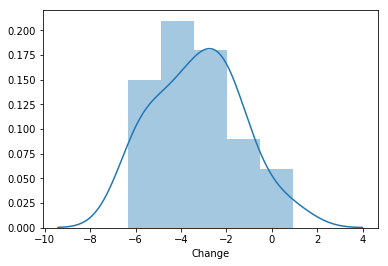

In [0]:
# Plot the histogram.
sns.distplot(pd.Series(usage_hobby.change * 100, name="Change"))

# Print t-test results.
t, p = stats.ttest_rel(list(usage_hobby[2017]), list(usage_hobby[2019]))
print('T-score: {}, p-score: {}, n: {}'.format(t, p, usage_hobby.shape[0]))

## Evaluation
$p < 0.01$, which means that this is a statistically significant difference. Therefore, we can claim that languages tend to get used more by professionals later. But this analysis is limited to languages that are already popular, and hence does not consider its early years.

These figures clearly answer the question.

# Deployment

Key findings from this analysis are used in a [blog post](https://medium.com/@maurits_94643/what-programming-language-do-you-use-in-2022-d083b2cafbd9).